<a href="https://colab.research.google.com/github/jhonatanparada499/supervised-learning-notes/blob/main/recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Kaggle Dataset

In [ ]:
# source: https://www.kaggle.com/discussions/general/74235
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

!kaggle datasets download -d sankalpsrivastava26/capital-alphabets-28x28

! unzip "capital-alphabets-28x28.zip"

##Import Libraries

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import metrics, svm, datasets
from sklearn.model_selection import train_test_split
# To encode non-numerical labels
from sklearn.preprocessing import LabelEncoder

# Import image processing library 2026-02-10
import skimage as ski
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np

# Import os to handle local files
import os

## Data Transformation Example

[[ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  3. 12. 10.  0.]
 [ 0.  0.  0.  5. 14. 14. 13.  1.]
 [ 0.  0.  3. 20. 17. 16.  6.  0.]
 [ 0.  1. 12. 17. 19. 15.  1.  0.]
 [ 0.  8. 14.  9. 16.  4.  0.  0.]
 [ 0.  3.  2.  8.  6.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


Text(0.5, 1.0, 'Resized')

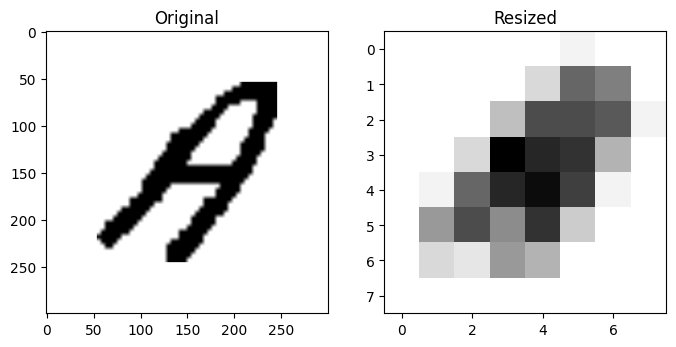

In [ ]:
IMG_PATH = "dataset/train/A/000000.png"
img = imread(IMG_PATH) # converts img into numerical data
inverted_img = ski.util.invert(img)
resized_img = resize(inverted_img, (8, 8), anti_aliasing=True) # makes img be 8x8 pixels

# Data Transformation
resized_img = 1.0 - resized_img
final_img = resized_img * 16

if resized_img.max() > 0:
    final_img = (resized_img / resized_img.max()) * 20
else:
    final_img = resized_img

final_img = np.round(final_img, 0) # 0 means the number of decimals
print(final_img)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(inverted_img, cmap=plt.cm.gray)
ax[0].set_title("Original")
# ax[1].imshow(resized_img, cmap=plt.cm.gray) # gray_r means inverted gray
ax[1].imshow(final_img, cmap=plt.cm.gray_r) # gray_r means inverted gray
ax[1].set_title("Resized")

## Processing Multiple Pictures

In [ ]:
PATH = "dataset/train/"

# production
categories = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

# testing
# categories = ["A", "B", "C"]

images = []
labels = []

img_paths = []
HARD_LIMIT = 1600

# Iterates through every directory in archive/
for index, category in enumerate(categories):
    img_index = 0
    for file in os.listdir(os.path.join(PATH, category)):

        if (img_index > HARD_LIMIT):
            break

        img_path = os.path.join(PATH, category, file)
        img = imread(img_path) # converts img into numerical data
        inverted_img = ski.util.invert(img)
        resized_img = resize(inverted_img, (8, 8), anti_aliasing=True) # makes img be 8x8 pixels

        # Data Transformation
        resized_img = 1.0 - resized_img
        final_img = resized_img * 16

        if resized_img.max() > 0:
            final_img = (resized_img / resized_img.max()) * 20
        else:
            final_img = resized_img

        final_img = np.round(final_img, 0) # 0 means the number of decimals

        # Populate Data(after flattening) and Label values
        images.append(final_img)

        # labels output: ["A", "A", ... "B", "B", ...]
        labels.append(categories[index])

        img_paths.append(img_path)

        # only process first 1000 images of each category
        img_index += 1

le = LabelEncoder()
labels = le.fit_transform(labels)

#print(images)
#print(labels)
#print(len(images))
# Test inverse transform
#print(images[0])
#print()
#print(le.inverse_transform([0]))
#print()
#print(images[2])
#print()
#print(le.inverse_transform([2]))

## Classification & Training Data After Shuffle

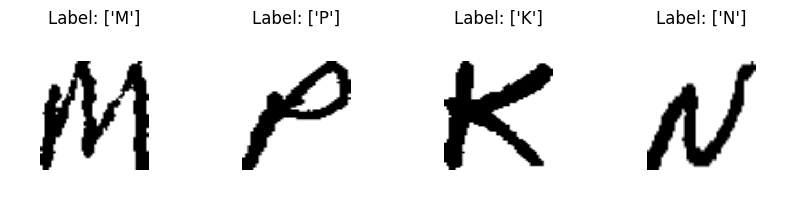

In [ ]:
# flatten the images
n_samples = len(images)
# data = images.reshape((n_samples, -1)) # returns error bc reshape is not a memeber of built-in list
data = np.array([img.ravel() for img in images])

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(
    data, labels, img_paths, test_size=.5, shuffle=True # Originally was False
)

# Training images with labels
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label, img_path in zip(axes, X_train, y_train, paths_train):
    ax.set_axis_off()
    # image = image.reshape(8, 8) # returns error bc reshape is not a member of built-in list (only works with scikit-learn dataset)
    image.shape = (8, 8)
    ax.imshow(imread(img_path), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {le.inverse_transform([label])}")

## Training & Prediction (Kaggle Dataset)

In [ ]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

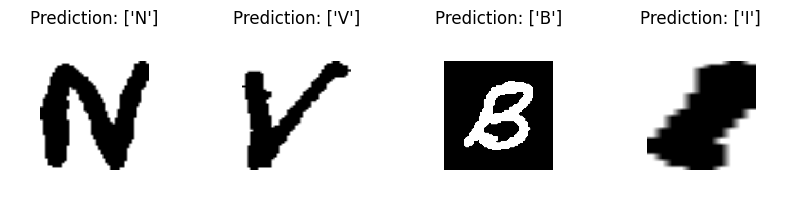

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction, img_path in zip(axes, X_test, predicted, paths_test):
    ax.set_axis_off()
    #image = image.reshape(8, 8) # returns error in my version
    image.shape = (8,8)
    ax.imshow(imread(img_path), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {le.inverse_transform([prediction])}")

## Report

In [ ]:
print(
    f"Classification report for Kaggle dataset:\n"
    f"{metrics.classification_report(y_test, predicted, target_names=le.classes_)}\n"
)

Classification report for Kaggle dataset:
              precision    recall  f1-score   support

           A       0.88      0.90      0.89       808
           B       0.88      0.83      0.85       810
           C       0.93      0.89      0.91       797
           D       0.90      0.85      0.88       774
           E       0.81      0.82      0.81       789
           F       0.91      0.89      0.90       812
           G       0.58      0.87      0.70       794
           H       0.89      0.83      0.86       811
           I       0.76      0.91      0.83       768
           J       0.91      0.89      0.90       817
           K       0.91      0.86      0.88       811
           L       0.96      0.93      0.95       808
           M       0.96      0.93      0.94       813
           N       0.92      0.90      0.91       779
           O       0.91      0.95      0.93       797
           P       0.90      0.92      0.91       820
           Q       0.93      0.84      

## Confusion Matrix

Confusion matrix:
[[728   7   0   2  10   3  19  11   5   1   1   0   0   0   0   5   1   9
    0   0   0   0   1   2   1   2]
 [ 22 674   3  28  21   3  21   1   7   2   0   0   1   0   4   0   2   8
    3   1   1   0   1   0   0   7]
 [  1  14 711   3  28   1   9   0   6   0   1  10   0   0   4   1   1   2
    1   0   1   1   0   0   0   2]
 [  5  20   1 657  13   0  19   0  10   2   0   0   1   1  32   3   1   0
    1   0   1   0   4   0   1   2]
 [  8  27  28   1 646   7  26   1  17   3   3   1   4   0   1   5   0   4
    1   1   1   2   0   0   1   1]
 [  2   0   1   1   7 725  14   0  11   0   1   0   2   0   0  33   1   1
    1   8   0   0   1   0   2   1]
 [  3  13   6   0  10   2 694   1  11   5   2   0   2   1   6   2  22   2
    3   1   3   0   2   0   0   3]
 [ 14   0   0   2   1   4  42 672  18   2   7   0   5  23   0   2   0   2
    0   0   2   2   1   2   6   4]
 [  0   0   0   0   7   3  22   0 699  13   1   4   1   0   0   0   1   0
    1   4   0   2   0   0   1   9]
 

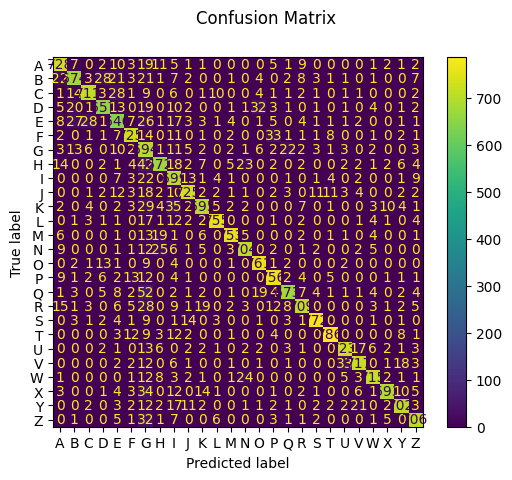

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, predicted, display_labels=le.classes_)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()